# Model 1

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
from tensorflow.keras.preprocessing import image
import os

# Define constants
IMG_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 10
TRAIN_DATASET_PATH = "dataset_dogs_vs_cats/train"
TEST_DATASET_PATH = "dataset_dogs_vs_cats/test"

# Data Augmentation & Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Load images from directory
train_generator = train_datagen.flow_from_directory(
    TRAIN_DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    TRAIN_DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="validation"
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load test images
test_generator = test_datagen.flow_from_directory(
    TEST_DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

Found 11900 images belonging to 2 classes.
Found 2974 images belonging to 2 classes.
Found 1004 images belonging to 2 classes.


In [2]:
# Define CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)

# Evaluate model
loss, acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {acc:.2f}")

/Users/rodrigoazevedo/repos/machine_learning/ml_venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/rodrigoazevedo/repos/machine_learning/ml_venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 43s 115ms/step - accuracy: 0.6240 - loss: 0.6655 - val_accuracy: 0.6705 - val_loss: 0.6224
Epoch 2/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 46s 123ms/step - accuracy: 0.6661 - loss: 0.6240 - val_accuracy: 0.6944 - val_loss: 0.5755
Epoch 3/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 45s 121ms/step - accuracy: 0.6874 - loss: 0.5968 - val_accuracy: 0.7162 - val_loss: 0.5602
Epoch 4/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 43s 116ms/step - accuracy: 0.7122 - loss: 0.5673 - val_accuracy: 0.7189 - val_loss: 0.5509
Epoch 5/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 50s 135ms/step - accuracy: 0.7211 - loss: 0.5540 - val_accuracy: 0.7411 - val_loss: 0.5142
Epoch 6/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 44s 119ms/step - accuracy: 0.7338 - loss: 0.5425 - val_accuracy: 0.7081 - val_loss: 0.5450
Epoch 7/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 41s 111ms/step - accuracy: 0.7520 - loss: 0.5155 - val_accuracy: 0.7458 - val_loss: 0.5144
Epoch 8/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 44s 118ms/step - accuracy: 0.7625 - loss: 0

In [3]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,914,309 (37.82 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,609,540 (25.21 MB)

In [4]:
# Save model
#model.save("custom_cnn_cats_dogs.h5")
#print("Model saved successfully!")

# Function to predict new images
def predict_image(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img = image.img_to_array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    print("Dog" if prediction > 0.5 else "Cat")

# Example Prediction
if __name__ == "__main__":
    test_image_path = "risca.jpg"
    if os.path.exists(test_image_path):
        predict_image(test_image_path)
    else:
        print("Test image not found!")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Dog


# Model 2 - larger images

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
from tensorflow.keras.preprocessing import image
import os

# Define constants
IMG_SIZE = (224, 224) 
BATCH_SIZE = 32
EPOCHS = 10
TRAIN_DATASET_PATH = "dataset_dogs_vs_cats/train"
TEST_DATASET_PATH = "dataset_dogs_vs_cats/test"

# Data Augmentation & Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Load images from directory
train_generator = train_datagen.flow_from_directory(
    TRAIN_DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    TRAIN_DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="validation"
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load test images
test_generator = test_datagen.flow_from_directory(
    TEST_DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

Found 11900 images belonging to 2 classes.
Found 2974 images belonging to 2 classes.
Found 5023 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
import os


# Define CNN model
model = Sequential([
    # First convolutional block
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2,2)),
    
    # Second convolutional block
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    # Third convolutional block
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    # Fully connected layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', # optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy', 
              metrics=['accuracy'])


# Define callbacks for better training
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_loss',
    patience=2,
    factor=0.5,
    min_lr=1e-6
)

# Train model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    callbacks=[early_stopping, learning_rate_reduction]
)

# Evaluate model
loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy: {acc:.4f}")

Epoch 1/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 135s 361ms/step - accuracy: 0.6124 - loss: 0.7477 - val_accuracy: 0.6268 - val_loss: 0.6419 - learning_rate: 0.0010
Epoch 2/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 130s 349ms/step - accuracy: 0.6475 - loss: 0.6359 - val_accuracy: 0.6685 - val_loss: 0.6012 - learning_rate: 0.0010
Epoch 3/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 127s 340ms/step - accuracy: 0.6771 - loss: 0.6059 - val_accuracy: 0.7098 - val_loss: 0.5592 - learning_rate: 0.0010
Epoch 4/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 129s 348ms/step - accuracy: 0.7079 - loss: 0.5723 - val_accuracy: 0.7340 - val_loss: 0.5282 - learning_rate: 0.0010
Epoch 5/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 127s 341ms/step - accuracy: 0.7183 - loss: 0.5577 - val_accuracy: 0.7041 - val_loss: 0.5625 - learning_rate: 0.0010
Epoch 6/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 128s 344ms/step - accuracy: 0.7541 - loss: 0.5162 - val_accuracy: 0.7619 - val_loss: 0.4884 - learning_rate: 0.0010
Epoch 7/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 126s 340ms/step - accura

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
# Function to predict a single image
def predict_image(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=IMG_SIZE)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    
    prediction = model.predict(img_array)
    result = "Dog" if prediction[0][0] > 0.5 else "Cat"
    confidence = prediction[0][0] if prediction[0][0] > 0.5 else 1 - prediction[0][0]
    
    print(f"Prediction: {result} with {confidence:.2%} confidence")
    
    #plt.imshow(img)
    #plt.title(f"{result}: {confidence:.2%}")
    #plt.axis('off')
    #plt.show()
    
    return result, confidence



In [12]:
predict_image("risca.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Prediction: Dog with 96.75% confidence


('Dog', np.float32(0.96752924))

In [13]:
predict_image("rosita.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction: Dog with 79.51% confidence


('Dog', np.float32(0.79514545))

In [ ]:
# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.savefig('training_history.png')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score
import seaborn as sns

# Get true labels and predictions
y_true = test_generator.classes  # True labels from test set
y_pred_probs = model.predict(test_generator)  # Probabilities
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # Convert probabilities to binary labels

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print classification report (includes precision, recall, F1-score)
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=['Cat', 'Dog']))

# Compute precision and recall
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Model 3 - One more layer and transfer learning

MobileNetV2 is a convolutional neural network architecture designed for mobile and edge devices. It was introduced by Google researchers in 2018 as an improvement over the original MobileNet architecture.
Key characteristics of MobileNetV2:

Efficiency: It's specifically designed to be lightweight and computationally efficient, making it suitable for mobile devices, embedded systems, and edge computing.
Architecture Features:

Uses depthwise separable convolutions (which split standard convolutions into depthwise and pointwise convolutions)
Introduces an inverted residual structure where the residual connections are between the bottleneck layers
Implements linear bottlenecks between layers to prevent information loss


Performance: Despite being lightweight, it achieves good accuracy on image classification tasks. It strikes an excellent balance between model size, speed, and accuracy.
Pre-trained Weights: It comes with pre-trained weights on the ImageNet dataset, which makes it excellent for transfer learning (where you take a pre-trained model and fine-tune it for your specific task).
Use Cases: Common applications include image classification, object detection, and segmentation on resource-constrained devices.

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
from tensorflow.keras.preprocessing import image
import os

# Define constants
IMG_SIZE = (224, 224) 
BATCH_SIZE = 32
EPOCHS = 10
TRAIN_DATASET_PATH = "dataset_dogs_vs_cats/train"
TEST_DATASET_PATH = "dataset_dogs_vs_cats/test"

# Data Augmentation & Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Load images from directory
train_generator = train_datagen.flow_from_directory(
    TRAIN_DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    TRAIN_DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="validation"
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load test images
test_generator = test_datagen.flow_from_directory(
    TEST_DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

Found 11900 images belonging to 2 classes.
Found 2974 images belonging to 2 classes.
Found 5023 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.applications import MobileNetV2
import numpy as np
import os
#import matplotlib.pyplot as plt


# Option 1: Advanced CNN model from scratch
def create_custom_model():
    model = Sequential([
        # First convolutional block
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(*IMG_SIZE, 3)),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        # Second convolutional block
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        # Third convolutional block
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        # Fourth convolutional block
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        # Fully connected layers
        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

# Option 2: Transfer learning with MobileNetV2
def create_transfer_learning_model():
    # Load the pretrained model
    base_model = MobileNetV2(
        weights='imagenet',
        include_top=False,
        input_shape=(*IMG_SIZE, 3)
    )
    
    # Freeze the base model
    base_model.trainable = False
    
    # Create new model on top
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    
    return model

# Choose which model to use (transfer learning recommended for better results)
# Uncomment the appropriate line:
#model = create_custom_model()  # Option 1: Custom CNN from scratch
model = create_transfer_learning_model()  # Option 2: Transfer learning (better performance)

# Compile model with a lower learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Define callbacks for better training
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=8,
    restore_best_weights=True,
    verbose=1
)

learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_loss',
    patience=3,
    factor=0.5,
    min_lr=1e-7,
    verbose=1
)

checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

# Model summary
model.summary()


history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    callbacks=[early_stopping, learning_rate_reduction]
)

'''
# Train model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=val_generator,
    validation_steps=val_generator.samples // 32,
    epochs=EPOCHS,
    callbacks=[early_stopping, learning_rate_reduction]
)
'''


test_results = model.evaluate(test_generator, verbose=1)
print(f"Test Loss: {test_results[0]:.4f}")
print(f"Test Accuracy: {test_results[1]:.4f}")
print(f"Test Precision: {test_results[2]:.4f}")
print(f"Test Recall: {test_results[3]:.4f}")
print(f"Test F1-Score: {2 * (test_results[2] * test_results[3]) / (test_results[2] + test_results[3]):.4f}")



9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,916,417 (11.13 MB)

 Trainable params: 657,409 (2.51 MB)

 Non-trainable params: 2,259,008 (8.62 MB)

/Users/rodrigoazevedo/repos/machine_learning/ml_venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
372/372 ━━━━━━━━━━━━━━━━━━━━ 80s 212ms/step - accuracy: 0.8868 - loss: 0.2723 - precision: 0.8072 - recall: 0.9150 - val_accuracy: 0.9701 - val_loss: 0.0822 - val_precision: 0.9758 - val_recall: 0.9432 - learning_rate: 1.0000e-04
Epoch 2/5
372/372 ━━━━━━━━━━━━━━━━━━━━ 79s 212ms/step - accuracy: 0.9624 - loss: 0.1077 - precision: 0.9467 - recall: 0.9549 - val_accuracy: 0.9728 - val_loss: 0.0832 - val_precision: 0.9639 - val_recall: 0.9631 - learning_rate: 1.0000e-04
Epoch 3/5
372/372 ━━━━━━━━━━━━━━━━━━━━ 80s 214ms/step - accuracy: 0.9673 - loss: 0.0900 - precision: 0.9576 - recall: 0.9551 - val_accuracy: 0.9741 - val_loss: 0.0776 - val_precision: 0.9616 - val_recall: 0.9694 - learning_rate: 1.0000e-04
Epoch 4/5
372/372 ━━━━━━━━━━━━━━━━━━━━ 78s 210ms/step - accuracy: 0.9697 - loss: 0.0818 - precision: 0.9565 - recall: 0.9617 - val_accuracy: 0.9748 - val_loss: 0.0666 - val_precision: 0.9650 - val_recall: 0.9676 - learning_rate: 1.0000e-04
Epoch 5/5
372/372 ━━━━━━━━━━━━━━━━━━━━ 8

NameError: name 'plt' is not defined

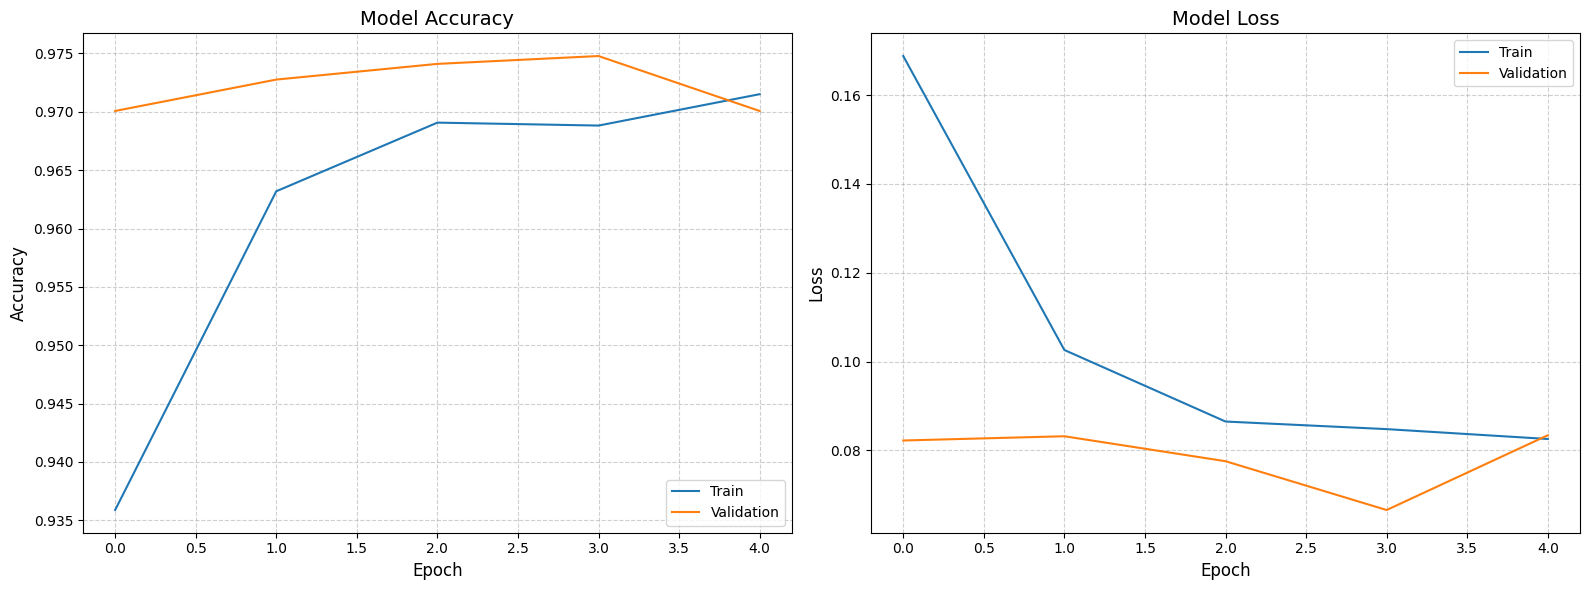

In [5]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    plt.figure(figsize=(16, 6))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy', fontsize=14)
    plt.ylabel('Accuracy', fontsize=12)
    plt.xlabel('Epoch', fontsize=12)
    plt.legend(['Train', 'Validation'], loc='lower right')
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss', fontsize=14)
    plt.ylabel('Loss', fontsize=12)
    plt.xlabel('Epoch', fontsize=12)
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.grid(True, linestyle='--', alpha=0.6)
    
    plt.tight_layout()
    plt.savefig('training_history.png', dpi=300, bbox_inches='tight')
    plt.show()

plot_training_history(history)

157/157 ━━━━━━━━━━━━━━━━━━━━ 25s 159ms/step
Classification Report:
               precision    recall  f1-score   support

         Cat       0.64      0.64      0.64      3177
         Dog       0.39      0.40      0.39      1846

    accuracy                           0.55      5023
   macro avg       0.52      0.52      0.52      5023
weighted avg       0.55      0.55      0.55      5023

Precision: 0.3874
Recall: 0.3960


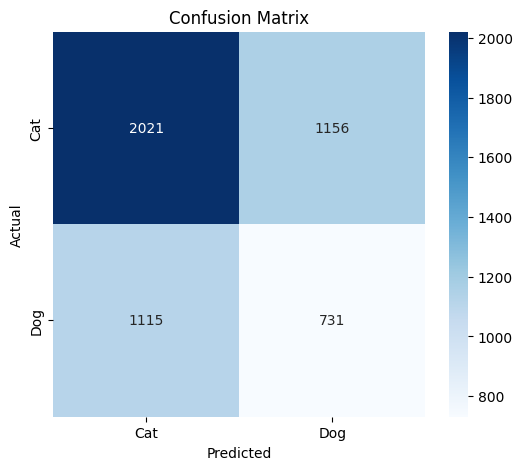

In [6]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score
import seaborn as sns

# Get true labels and predictions
y_true = test_generator.classes  # True labels from test set
y_pred_probs = model.predict(test_generator)  # Probabilities
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # Convert probabilities to binary labels

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print classification report (includes precision, recall, F1-score)
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=['Cat', 'Dog']))

# Compute precision and recall
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [7]:
test_results = model.evaluate(test_generator, verbose=1)
print(f"Test Loss: {test_results[0]:.4f}")
print(f"Test Accuracy: {test_results[1]:.4f}")
print(f"Test Precision: {test_results[2]:.4f}")
print(f"Test Recall: {test_results[3]:.4f}")
print(f"Test F1-Score: {2 * (test_results[2] * test_results[3]) / (test_results[2] + test_results[3]):.4f}")


157/157 ━━━━━━━━━━━━━━━━━━━━ 25s 157ms/step - accuracy: 0.9746 - loss: 0.0543 - precision: 0.9473 - recall: 0.9828
Test Loss: 0.0537
Test Accuracy: 0.9787
Test Precision: 0.9608
Test Recall: 0.9821
Test F1-Score: 0.9713


In [8]:
y_pred_probs = model.predict(test_generator)  # Probabilities

157/157 ━━━━━━━━━━━━━━━━━━━━ 25s 157ms/step


In [9]:
y_pred_probs

array([[8.9275229e-05],
       [1.2712565e-03],
       [8.3593535e-04],
       ...,
       [1.2712684e-03],
       [7.8344023e-01],
       [2.3496645e-03]], dtype=float32)

In [10]:
# save the model
model.save("mobile_net_transfer_learning_cat_dog.h5")

In [ ]:
# Function to predict a single image
def predict_image(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=IMG_SIZE)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    
    prediction = model.predict(img_array)
    result = "Dog" if prediction[0][0] > 0.5 else "Cat"
    confidence = prediction[0][0] if prediction[0][0] > 0.5 else 1 - prediction[0][0]
    
    print(f"Prediction: {result} with {confidence:.2%} confidence")
    
    #plt.imshow(img)
    #plt.title(f"{result}: {confidence:.2%}")
    #plt.axis('off')
    #plt.show()
    
    return result, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
Prediction: Dog with 99.99% confidence


('Dog', np.float32(0.99986744))

In [12]:
predict_image("risca.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Prediction: Dog with 99.99% confidence


('Dog', np.float32(0.99986744))

In [13]:
predict_image("cat.0.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prediction: Cat with 94.48% confidence


('Cat', np.float32(0.94484967))

In [14]:
predict_image("rosita.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction: Dog with 100.00% confidence


('Dog', np.float32(0.99996495))